In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [4]:
df=pd.read_csv('student_clustering.csv')

In [5]:
df.shape

(200, 2)

In [6]:
df.head()


,cgpa,iq
0,5.13,88
1,5.90,113
2,8.36,93
3,8.27,97
4,5.45,110


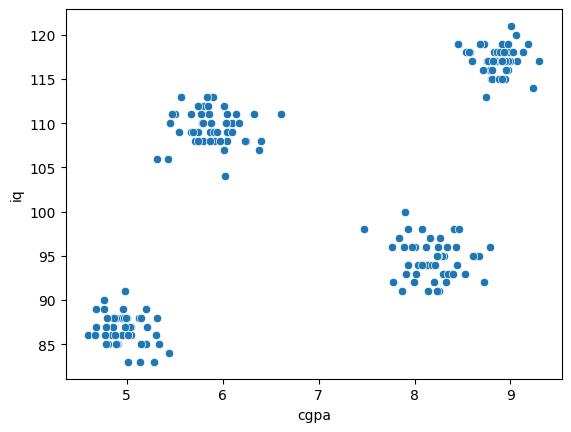

In [7]:
sns.scatterplot(x='cgpa',y='iq',data=df)
plt.show()

In [91]:
std=StandardScaler()
scaled_data=std.fit_transform(df[['cgpa','iq']])

In [113]:
km=KMeans(n_clusters=4)
km.fit(scaled_data)
pred_scaled=km.predict(scaled_data)

In [114]:
scaled_data.shape

(200, 2)

In [115]:
pred_scaled

array([1, 2, 3, 3, 2, 2, 3, 0, 2, 3, 1, 2, 3, 1, 2, 3, 2, 3, 2, 2, 3, 1,
       3, 1, 1, 3, 1, 0, 3, 2, 0, 2, 0, 2, 3, 3, 0, 2, 1, 2, 1, 3, 3, 1,
       0, 0, 3, 2, 0, 2, 1, 1, 0, 3, 0, 2, 2, 0, 2, 0, 2, 3, 3, 0, 1, 0,
       3, 1, 2, 3, 2, 0, 3, 1, 2, 0, 2, 0, 1, 3, 3, 0, 2, 1, 0, 1, 0, 2,
       0, 2, 0, 0, 3, 1, 3, 3, 0, 3, 1, 0, 2, 1, 1, 0, 1, 1, 3, 1, 0, 0,
       3, 0, 2, 2, 3, 0, 3, 2, 0, 1, 1, 2, 3, 0, 3, 1, 3, 2, 1, 3, 3, 2,
       1, 1, 2, 0, 2, 1, 3, 3, 3, 1, 2, 1, 1, 0, 1, 0, 2, 1, 0, 1, 0, 0,
       1, 3, 2, 0, 2, 3, 1, 0, 2, 3, 0, 1, 2, 1, 1, 0, 0, 2, 0, 1, 1, 3,
       0, 2, 1, 0, 0, 2, 2, 2, 3, 1, 3, 3, 0, 2, 3, 3, 1, 1, 3, 1, 0, 2,
       2, 0], dtype=int32)

In [116]:
test_point=np.array([[8.8,117]])
test_point.shape

(1, 2)

In [117]:
scaled_test_point=std.transform(test_point)
scaled_test_point

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[1.12133315, 1.23689766]])

In [118]:
km.predict(scaled_test_point)

array([0], dtype=int32)

In [119]:
df['Predictions']=pred_scaled

In [120]:
df.shape

(200, 3)

In [121]:
df.head()


,cgpa,iq,Predictions
0,5.13,88,1
1,5.90,113,2
2,8.36,93,3
3,8.27,97,3
4,5.45,110,2


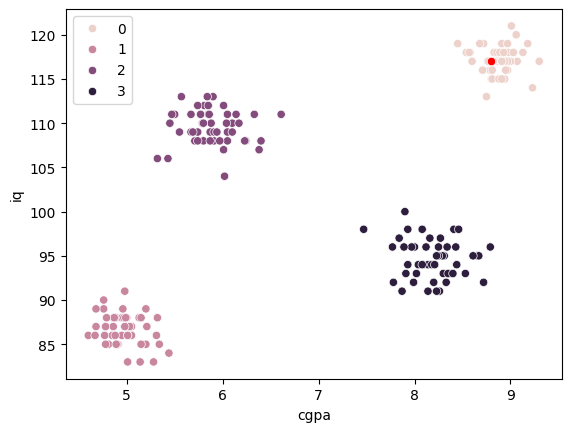

In [122]:
sns.scatterplot(data=df,x='cgpa',y='iq', hue='Predictions')
sns.scatterplot(x=test_point[:,0],y=test_point[:,1],color='red')
plt.show()

Try predictions for different test points
 A> [7.8, 99]
 B> [6.7, 86]
 c> [7.1, 110]
 Make predictions on all of these points and visualise the prediction to confirm
that it makes sense

In [140]:
test_point_a=np.array([[7.8,99]])
test_point_b=np.array([[6.7,86]])
test_point_c=np.array([[7.1,110]])

In [141]:
scaled_test_point_a=std.transform(test_point_a)
scaled_test_point_b=std.transform(test_point_b)
scaled_test_point_c=std.transform(test_point_c)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [142]:
pred_a=km.predict(scaled_test_point_a)
pred_b=km.predict(scaled_test_point_b)
pred_c=km.predict(scaled_test_point_c)

In [144]:
print("pred a: ",pred_a)
print("pred b: ",pred_b)
print("pred c: ",pred_c)

pred a:  [3]
pred b:  [1]
pred c:  [2]


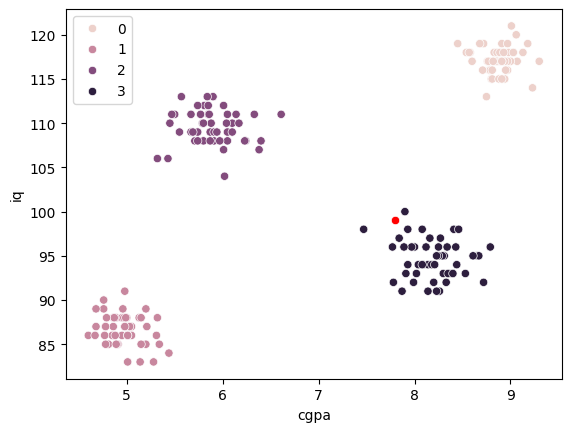

In [145]:
#Plot A
sns.scatterplot(data=df,x='cgpa',y='iq', hue='Predictions')
sns.scatterplot(x=test_point_a[:,0],y=test_point_a[:,1],color='red')
plt.show()

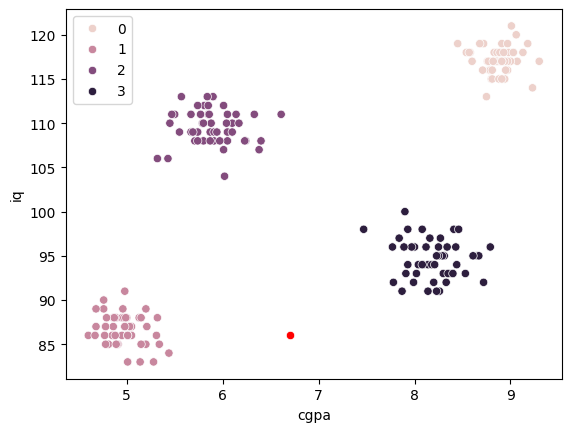

In [146]:
#Plot B
sns.scatterplot(data=df,x='cgpa',y='iq', hue='Predictions')
sns.scatterplot(x=test_point_b[:,0],y=test_point_b[:,1],color='red')
plt.show()

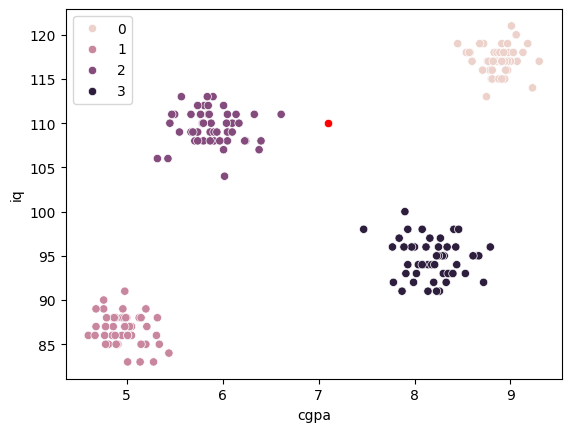

In [147]:
#Plot C
sns.scatterplot(data=df,x='cgpa',y='iq', hue='Predictions')
sns.scatterplot(x=test_point_c[:,0],y=test_point_c[:,1],color='red')
plt.show()

Train another model by the name of km_raw on data which is not scaled
 Then, make predictions for all the above 4 points and visualise the predictions
and notice the difference

In [53]:

df2=df.drop(['Predictions'],axis=1)
km_raw=KMeans(n_clusters=4)
km_raw.fit(df2)
pred_raw=km_raw.predict(df2)


In [54]:
test_point=np.array([[8.8,109]])
test_point.shape

(1, 2)

In [55]:
#predict
km_raw.predict(test_point)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


array([0], dtype=int32)

In [56]:
df2['Pred_raw']=pred_raw

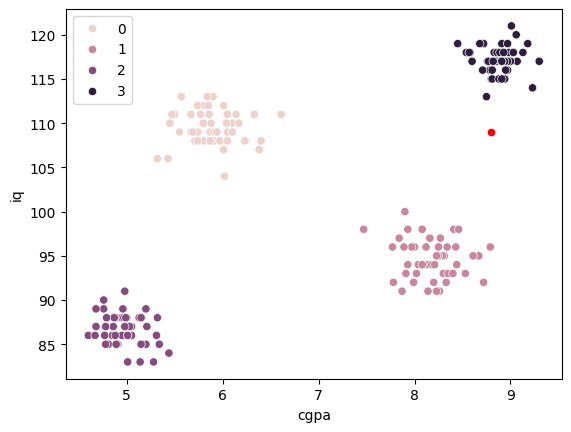

In [57]:
#plotand see
df['Predictions']=pred_raw
sns.scatterplot(data=df2,x='cgpa',y='iq', hue='Pred_raw')
sns.scatterplot(x=test_point[:,0],y=test_point[:,1],color='red')
plt.show()

Hence, it is observed that unscaleddata leads to imbalanced results.